Plot saved as H_kin_Q2_Dummy_Subtraction_24242_minus_24235.png


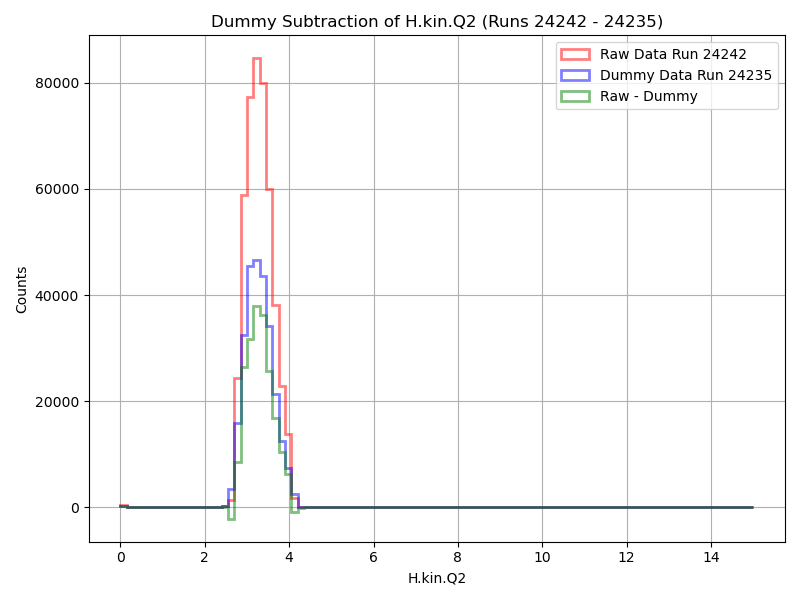

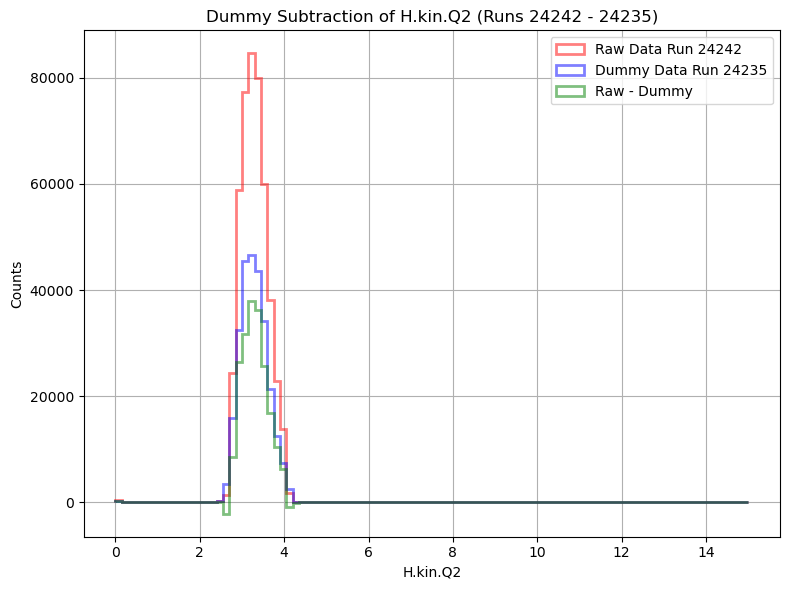

In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subprocess

# matplotlib.use('Agg')  # Use non-interactive backend, comment this out for jupyter hub

# Define run numbers
run_raw = 24242
run_dummy = 24235

# Define variable of interest
var = "H.kin.Q2"

# Toggle to apply pion selection cuts
apply_cuts = True

# File paths HMS
raw_data_path = f'/w/hallc-scshelf2102/c-rsidis/relder/ROOTfiles/hms_coin_replay_production_{run_raw}_-1.root'
dummy_data_path = f'/w/hallc-scshelf2102/c-rsidis/relder/ROOTfiles/hms_coin_replay_production_{run_dummy}_-1.root'

# File paths COIN
# raw_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_{run_raw}_-1.root'
# dummy_data_path = f'/net/cdaq/cdaql3data/cdaq/hallc-online-rsidis2025/ROOTfiles/shms_coin_replay_production_{run_dummy}_-1.root'

# Defining extracted variables
variables = ["H.cal.etottracknorm", "H.cer.npeSum", var]

# Function to load data from ROOT files
def load_data(file_path):
    file = uproot.open(file_path)
    tree = file['T']
    return tree.arrays(variables, library="np")

# Load raw and dummy data
data_raw = load_data(raw_data_path)
data_dummy = load_data(dummy_data_path)

# Extract relevant variables
cal_raw, cer_raw, var_raw = data_raw['H.cal.etottracknorm'], data_raw['H.cer.npeSum'], data_raw[var]
cal_dummy, cer_dummy, var_dummy = data_dummy['H.cal.etottracknorm'], data_dummy['H.cer.npeSum'], data_dummy[var]

do_apply_cuts = True  # <-- renamed

def apply_cuts(cal, cer, var):
    cut = (cal > 0.7) & (cer > 1)
    return var[cut]

# Apply only if toggled
if do_apply_cuts:
    var_raw = apply_cuts(cal_raw, cer_raw, var_raw)
    var_dummy = apply_cuts(cal_dummy, cer_dummy, var_dummy)

# Define histogram settings
bin_min, bin_max, bin_number = 0, 15, 100
bins = np.linspace(bin_min, bin_max, bin_number + 1)
plt.figure(figsize=(8, 6))

# Plot raw data
counts_raw, bin_edges, _ = plt.hist(var_raw, bins=bins, histtype='step', color='red', label=f'Raw Data Run {run_raw}', alpha=0.5, linewidth=2)

# Plot dummy data
counts_dummy, _, _ = plt.hist(var_dummy, bins=bins, histtype='step', color='blue', label=f'Dummy Data Run {run_dummy}', alpha=0.5, linewidth=2)

# Subtract dummy data from raw data
counts_subtracted = counts_raw - counts_dummy

# Plot subtracted data
plt.hist(bin_edges[:-1], bins=bins, weights=counts_subtracted, histtype='step', color='green', alpha=0.5, label='Raw - Dummy', linewidth=2)

# Customize the plot
plt.xlabel(var)
plt.ylabel('Counts')
# plt.yscale('log')
plt.title(f'Dummy Subtraction of {var} (Runs {run_raw} - {run_dummy})')
plt.legend()
plt.grid(True)

plt.tight_layout()
output_filename = f'{var.replace(".", "_")}_Dummy_Subtraction_{run_raw}_minus_{run_dummy}'

plt.savefig(f"{output_filename}.png")
print(f"Plot saved as {output_filename}.png")

# Show the image in notebook
from IPython.display import Image
Image(filename=f"{output_filename}.png")